# Übung 13: Numerische Untersuchung des Bingham-Hooke-Körpers

---

## Der Bingham-Hooke-Körper

In dieser Programmierübung soll das Verhalten des Bingham-Hooke-Körpers zur Beschreibung von elasto-viskoplastischem Materialverhalten numerisch untersucht werden. Wie unten dargestellt enstpricht der Bingham-Hooke-Körper einer Reihen-Paralellschaltung bestehend aus einem Hooke-, Reib-, und Newton-Element.
<p style="padding: 5px 0 5px 0;">
<img src="bingham-hooke.png" width="375" style="display: block; margin: 0 auto;" />
</p>
Das Stoffgesetz des Bingham-Hooke-Körpers wurde bereits in einem vergangenen Klausurvorbereitungskurs über die Einführung einer Fallunterscheidung hergeleitet.
<p style="padding: 15px 0 4px 0;">
$$\normalsize\begin{flalign}
\sigma = E \, \varepsilon \quad \text{für} \quad &\sigma_2 < \sigma_\mathrm{y} \, , \\[1.5ex]
\sigma + \dfrac{\eta}{E} \, \dot{\sigma} = \eta \; \dot{\varepsilon} + \sigma_\mathrm{y} \quad \text{für} \quad &\sigma_2 = \sigma_\mathrm{y} \, .
\end{flalign}$$
</p>
Anstatt das elasto-viskoplastische Materialverhalten über analytische Lösungen mit entsprechenden Ansatzfunktionen und Anfangsbedingungen für einen vorgegebenen Belastungsverlauf zu bestimmen, soll in dieser Übung das Materialverhalten alternativ über einen numerischen Lösungsansatz gelöst werden.

---
## Numerische Berechnungsformeln

Die numerische Lösung des Bingham-Hooke-Körpers wurde bereits in der Vorlesung mittels einer alternativen Notation hergeleitet. Die Update-Formel für die Spannung $\sigma$ und die Evolutionsgleichung der viskoplastischen Dehnung $\dot{\varepsilon}_\mathrm{vp}$ zusammen mit den Definitionen des viskoplastischen Multiplikators $\lambda$ und der Fließfunktion $\varPhi$ ergeben sich zu
<p style="padding: 2px 0 0px 0;">
$$\normalsize\begin{flalign}
\sigma = E \; \varepsilon_\mathrm{e} = E \, \left[\varepsilon - \varepsilon_\mathrm{vp}\right] \, ,& \\[2ex]
\dot{\varepsilon}_\mathrm{vp} = \dfrac{\sigma - \sigma_\mathrm{p}}{\eta} = \lambda \, \dfrac{\sigma}{\vert\,\sigma\,\vert} \, ,& \\[2ex]
\lambda = \dfrac{\mathrm{max}\{0, \varPhi\}}{\eta} \geq 0 \, ,& \\[2ex]
\varPhi = \vert\,\sigma\,\vert - \sigma_\mathrm{y} \, .&
\end{flalign}$$
</p>

## Numerische Integration der Evolutionsgleichung

Um ein Update für die viskoplastische Dehnung $\varepsilon_\mathrm{vp}$ zu erhalten, wird die obige Evolutionsgleichung $\dot{\varepsilon}_\mathrm{vp}$ über den impliziten Euler rückwärts numerisch integriert. Ausgehend von der viskoplastischen Dehnung $\varepsilon_{\mathrm{vp}\,n}$ aus dem vorherigen Zeitschritt und der Spannung $\sigma_{n+1}$ sowie viskoplastischen Multiplikator $\lambda_{n+1}$ aus dem aktuellen Zeitschritt ergibt sich
<p style="padding: 2px 0 3px 0;">
$$\normalsize\begin{gather}
\dfrac{\varepsilon_{\mathrm{vp}\,n+1} - \varepsilon_{\mathrm{vp}\,n}}{\Delta t} = \Big. \dot{\varepsilon}_{\mathrm{vp}} \, |_{n+1} = \lambda_{n+1} \, \dfrac{\sigma_{n+1}}{\vert\,\sigma_{n+1}\,\vert} \, .
\end{gather}$$
</p>

---
## Update der Spannung und viskoplastischen Dehnung

Unter Berücksichtigung der Zeitdiskretisierung lässt sich die Spannung $\sigma$ im aktuellen Zeitschritt darstellen als
<p style="padding: 2px 0 0px 0;">
$$\normalsize\begin{gather}
\sigma_{n+1}\!\left(\varepsilon_{n+1}, \varepsilon_{\mathrm{vp}\,n+1}\right) = E \, \left[\varepsilon_{n+1} - \varepsilon_{\mathrm{vp}\,n+1}\right] \, .
\end{gather}$$
</p>
Die Trial-Fließfunktion $\varPhi^\mathrm{tr}$ und die Trial-Spannung $\sigma^\mathrm{tr}$ ergeben sich für eine rein elastische Materialantwort mit $\Delta\lambda = \Delta t \, \lambda_{n+1} = 0$ bzw. $\varepsilon_{\mathrm{vp}\,n+1} = \varepsilon_{\mathrm{vp}\,n}$ zu
<p style="padding: 2px 0 0px 0;">
$$\normalsize\begin{gather}
\varPhi^\mathrm{tr} = \vert\,\sigma^\mathrm{tr}\,\vert - \sigma_\mathrm{y} \, , \\[1.5ex]
\sigma^\mathrm{tr} = E \, \left[\varepsilon_{n+1} - \varepsilon_{\mathrm{vp}\,n}\right] \, .
\end{gather}$$
</p>
Durch Umformung der zeitintegrierten Evolutionsgleichung und Ausnutzung der Bedingung $\sigma/\vert\,\sigma\,\vert = \sigma^\mathrm{tr}/\vert\,\sigma^\mathrm{tr}\,\vert$, siehe Vorlesung, zusammen mit $\varPhi = \varPhi^\mathrm{tr} - E \, \Delta \lambda$, ergibt sich
<p style="padding: 2px 0 0px 0;">
$$\normalsize\begin{gather}
\varepsilon_{\mathrm{vp}\,n+1} = \varepsilon_{\mathrm{vp}\,n} + \Delta\lambda \, \dfrac{\sigma^\mathrm{tr}}{\vert\,\sigma^\mathrm{tr}\,\vert} \, , \\
\Delta\lambda = \Delta t \, \frac{\mathrm{max}\{0, \varPhi^\mathrm{tr}\}}{{\eta}/{\Delta t} + E} \, .
\end{gather}$$
</p>

---
## Predictor-Corrector Methode

Für die Implementierung der Materialantwort ersetzen wir die hergeleiteten Gleichungen durch eine sogenannte Predictor-Corrector-Methode. Diese ermöglicht eine effiziente Unterscheidung zwischen elastischen und viskoplastischen Zuständen und führt zu den folgenden numerischen Berechnungsformeln, die wir im Folgenden implementieren wollen.

### Predictor-Schritt (elastische Annahme)

Im ersten Schritt (Predictor) wird unter der Annahme eines rein elastischen Materialverhaltens mit $\Delta \lambda = 0$ die Trial-Fließfunktion $\varPhi^\mathrm{tr}$ berechnet. Falls $\varPhi^\mathrm{tr} \leq 0$ ist, so war die Annahme richtig und die Materialantwort ist in diesem Zeitschritt tatsächlich elastisch. Die Trial-Werte werden dann als Lösung übernommen.

<p style="padding: 0px 0 0px 0;">
$$\normalsize\begin{gather}
\text{Falls} \quad \varPhi^\mathrm{tr} \leq 0: \\[1.5ex]
\sigma_{n+1} = \sigma^\mathrm{tr} \\[1.5ex]
\varepsilon_{\mathrm{vp}\,n+1} = \varepsilon_{\mathrm{vp}\,n}
\end{gather}$$
</p>

### Corrector-Schritt (viskoplastische Korrektur)

Andernfalls gilt $\Phi^\mathrm{tr} > 0$ und es liegt ein viskoplastisches Materialverhalten in diesem Zeitschritt mit $\Delta \lambda > 0$ vor. In diesem Fall wird die Lösung entsprechend korrigiert.
<p style="padding: 2px 0 0px 0;">
$$\normalsize\begin{gather}
\text{Falls} \quad \varPhi^\mathrm{tr} > 0: \\[1.5ex]
\sigma_{n+1} = E \, \left[\varepsilon_{n+1} - \varepsilon_{\mathrm{vp}\,n+1}\right] \\[1.5ex]
\varepsilon_{\mathrm{vp}\,n+1} = \varepsilon_{\mathrm{vp}\,n} + \Delta\lambda \dfrac{\sigma^\mathrm{tr}}{\vert\,\sigma^\mathrm{tr}\,\vert} \\[0.5ex]
\Delta\lambda = \dfrac{\Phi^\mathrm{tr}}{{\eta}/{\Delta t} + E}
\end{gather}$$
</p>

---
# Umsetzung in Python

Für die schrittweise Berechnung der numerischen Lösung des Bingham-Hooke-Körpers bietet sich eine Implementierung in Python an.

## Import aller benötigten Bibliotheken

Zunächst werden die für die numerische Umsetzung benötigten Python-Bibliotheken importiert.

In [1]:
# Erforderliche Bibliotheken importieren
import numpy as np                # Für numerische Berechnungen
from scipy.optimize import fsolve # Zur Lösung von Gleichungssystemen
import matplotlib.pyplot as plt   # Für die Erstellung von Plots

Des Weiteren werden einige Standard-Einstellungen für die Darstellung der nachfolgenden Diagramme mit matplotlib festgelegt, wie beispielsweise die Linienstärke und Schriftgröße. Eine Übersicht über die verfügbaren Einstellungen finden Sie [hier](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

In [2]:
# Darstellung der Plots anpassen
plt.rcParams['figure.figsize'] = [15,6] # Größe der Plots (Breite, Höhe) vorgeben
plt.rcParams['lines.linewidth'] = 2     # Linienstärke der Kurven anpassen
plt.rcParams['axes.grid'] = True        # Gitternetzlinien aktivieren
plt.rcParams['font.size'] = 14          # Schriftgröße auf 14 Punkt einstellen

---
# Bestimmung der Spannung für eine vorgegebene Dehnung

Es soll zunächst eine Funktion implementiert werden, welche für eine vorgegebene Dehnung $\varepsilon_{n+1}$ die Updates der Spannung $\sigma_{n+1}$ und der viskoplastischen Dehnung $\varepsilon_{\mathrm{vp}\,n+1}$ berechnet. Die Funktion benötigt dazu die Materialparameter $E$, $\sigma_\mathrm{y}$, $\eta$ sowie die viskoplastische Dehnung $\varepsilon_{\mathrm{v}\,n}$ aus dem letzten Zeitschritt und die Zeitschrittweite $\Delta t$.

---
**Aufgabe**

Vervollständigen Sie die Funktion `stress` zur Bestimmung der Spannung $\sigma_{n+1}$ und der viskoplastischen Dehnung $\varepsilon_{\mathrm{vp}\,n+1}$ im aktuellen Zeitschritt.

**Hinweis**: Implementieren Sie die Predictor-Corrector Methode.

<style>
table {
    border-collapse: collapse; 
}
th, td {
    border: 1px solid black;
    padding: 8px;
}
th {
    text-align: center;
}
</style>
<table>
    <thead>
        <tr>
            <th style="padding-right: 30px;">Trial Step</th>
            <th style="padding-right: 30px;">Falls \(\Phi^{\text{tr}} \le 0\)</th>
            <th>Falls \(\Phi^{\text{tr}} > 0\)</th> 
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan="1" style="padding-right: 30px;">
                <p style="margin-bottom: 16px;">
                $$\normalsize
                \begin{gather*}
                    \Phi^{\text{tr}} = \vert\,\sigma^{\text{tr}}\,\vert - \sigma_{\text{y}} \\[2ex]
                    \sigma^{\text{tr}} = E \, \left[ \varepsilon_{n+1} - \varepsilon_{\text{vp}\,n} \right] \\[2ex]
                    \phantom{\Delta\lambda = {\Phi^{\text{tr}}}\,/\,{\left[{\eta}\,/\,{\Delta t} + E\right]}}
                \end{gather*}
                $$
                </p>
            </td>
            <td rowspan="1" style="padding-right: 30px;">
                <p style="margin-bottom: 18px;">
                $$\normalsize
                \begin{gather*}
                    \sigma_{n+1} = \sigma^{\text{tr}} \\[2ex]
                    \varepsilon_{\text{vp}\,n+1} = \varepsilon_{\text{vp}\,n} \\[2ex]
                    \phantom{\Delta\lambda = {\Phi^{\text{tr}}}\,/\,{\left[{\eta}\,/\,{\Delta t} + E\right]}}
                \end{gather*}
                $$
                </p>
            </td>
            <td rowspan="1">
                <p>
                $$\normalsize
                \begin{gather*}
                    \sigma_{n+1} = E \, \left[\varepsilon_{n+1} - \varepsilon_{\text{vp}\,n+1}\right] \\[2ex]
                    \varepsilon_{\text{vp}\,n+1} = \varepsilon_{\text{vp}\,n} + \Delta\lambda \,\; {\sigma^{\text{tr}}}\,/\,{\vert\,\sigma^{\text{tr}}\vert\,} \\[2ex]
                    \Delta\lambda = {\Phi^{\text{tr}}}\,/\,{\left[{\eta}\,/\,{\Delta t} + E\right]}
                \end{gather*}
                $$
                </p>
            </td>
        </tr>
    </tbody>
</table>

In [3]:
# Achtung: Die Benennung der Funktion und die Reihenfolge der Variablen sollte beibehalten werden!
def stress(eps, epsvpn, dt, E, sigy, eta):
    """
    Berechnet die Spannung (sig) und die viskoplastische Dehnung (epsvp) des Bingham-Hooke-Körpers.
    """
    
    # Berechnung der Trial-Spannung
    # (elastische Annahme mit epsvp = epsvpn, da dlambda = 0)
    sigtr = E * (eps - epsvpn)
    
    # Berechnung der Trial-Fließfunktion
    phitr = np.abs(sigtr) - sigy
    
    # Überprüfung des Materialzustands
    if phitr <= 0:
        # Elastischer Zustand: Keine viskoplastische Verformung
        # Spannung entspricht der Trial-Spannung
        sig = sigtr
        
        # Viskoplastische Dehnung bleibt unverändert
        epsvp = epsvpn
        
    else:
        # Visko-plastischer Zustand: Fließen tritt auf
        # Berechnung des viskoplastischen Multiplikators
        dlambda = phitr / (eta / dt + E)
        
        # Update der viskoplastischen Dehnung (implizites Euler rückwärts Verfahren)
        epsvp = epsvpn + dlambda * sigtr/np.abs(sigtr)
        
        # Update der Spannung unter Berücksichtigung der viskoplastischen Dehnung
        sig = E*(eps - epsvp)
    
    return sig, epsvp

**Überprüfung der Implementierung**

Die folgende Zelle testet Ihre Implementierung der Funktion `stress` gegenüber einer Referenzlösung. Sollten Abweichungen auftreten, überprüfen und korrigieren Sie Ihre Funktion. Führen Sie anschließend diese Zelle erneut aus, um den Test zu wiederholen.

In [4]:
# Testfunktion aus Musterlösung importieren
from musterloesungen import test_stress

# Implementierung der Spannungsfunktion überprüfen
test_stress(stress)

Die Funktion ist korrekt.


---
# Beispiel: Relaxationsversuch unter zyklischer Belastung

Im Folgenden soll die Funktion `stress` verwendet werden, um die Spannungsantwort für einen Relaxationsversuch unter zyklischer Belastung zu berechnen. Als Lastpfad soll der unten abgebildete stückweise lineare Dehnungsverlauf $\varepsilon\!\left(t\right)$, wie unten abgebildet, vorgegeben werden.

<p style="padding: 0px 0 15px 0;">
<img src="prescribed_strains.png" width="1100" style="display: block; margin: 0 auto;" />
</p>

---
**Aufgabe**

Vervollständigen Sie den Programmcode in der folgenden Zelle, um den oben dargestellten Dehnungsverlauf $\varepsilon_{n+1}\!\left(t\right)$ zu erzeugen.

**Hinweis**:
Die NumPy-Funktionen [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [`np.full`](https://numpy.org/doc/stable/reference/generated/numpy.full.html) und [`np.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) werden verwendet.

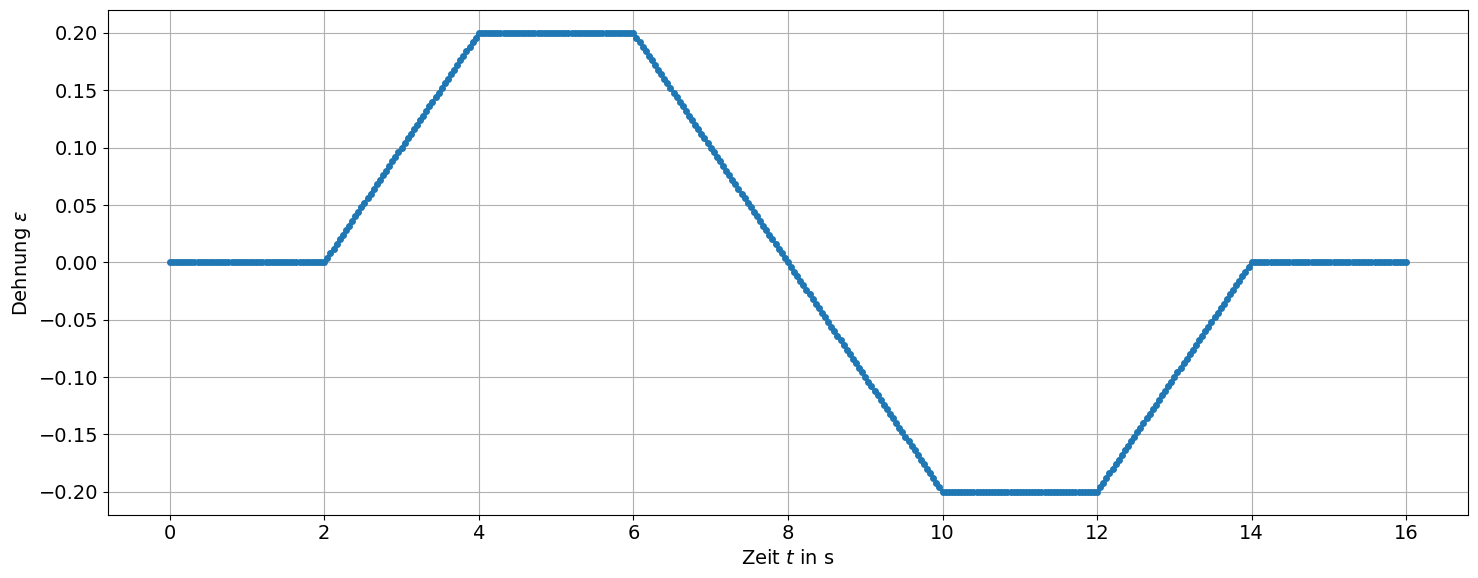

In [5]:
def generate_load(start_time, end_time, start_load, end_load, num_points=10, endpoint=True):
    """
    Generiert Zeitpunkte, Zeitinkremente und Dehnungswerte für einen Belastungsabschnitt.
    """

    # Zeitpunkte des Belastungsabschnitts erzeugen (lineare Interpolation)
    time_points = np.linspace(start_time, end_time, num_points, endpoint=endpoint) 

    # Dehnungswerte des Belastungsabschnitts erzeugen (lineare Interpolation)
    load_values = np.linspace(start_load, end_load, num_points, endpoint=endpoint)

    # Zeitinkremente des Belastungsabschnitts erzeugen (konstant)
    time_increments = np.full(num_points, (end_time - start_time) / num_points)

    # Rückgabe der Arrays mit Zeitpunkten, Zeitinkrementen und Dehnungswerten
    return time_points, time_increments, load_values 

# Skalierungsfaktor für die Anzahl der Datenpunkte pro Belastungsabschnitt
fct = 50

# Definition der Belastungsabschnitte
t_1, dt_1, eps_1 = generate_load( 0.0, 2.0,   0.0,  0.0, 1*fct,  False)
t_2, dt_2, eps_2 = generate_load( 2.0, 4.0,   0.0,  0.2, 1*fct,  False)
t_3, dt_3, eps_3 = generate_load( 4.0, 6.0,   0.2,  0.2, 1*fct, False)
t_4, dt_4, eps_4 = generate_load( 6.0, 10.0,  0.2, -0.2, 2*fct, False)
t_5, dt_5, eps_5 = generate_load(10.0, 12.0, -0.2, -0.2, 1*fct, False)
t_6, dt_6, eps_6 = generate_load(12.0, 14.0, -0.2,  0.0, 1*fct, False)
t_7, dt_7, eps_7 = generate_load(14.0, 16.0,  0.0,  0.0, 1*fct, True)

# Zusammenfügen der Arrays für die gesamte Belastung
t = np.concatenate([t_1, t_2, t_3, t_4, t_5, t_6, t_7])
dt = np.concatenate([dt_1, dt_2, dt_3, dt_4, dt_5, dt_6, dt_7])
eps = np.concatenate([eps_1, eps_2, eps_3, eps_4, eps_5, eps_6, eps_7])

# Plot: Zeitlicher Verlauf der Dehnung
plt.plot(t, eps, '-', marker='o', markersize=4)
plt.xlabel(r"Zeit $t$ in s")
plt.ylabel(r"Dehnung $\varepsilon$")
plt.tight_layout()

---
**Aufgabe**

Vervollständigen Sie den folgenden Programmcode, um die Materialantwort für den definierten Dehnungsverlauf $\varepsilon\!\left(t\right)$ im Relaxationsversuch zu berechnen.

**Hinweise**:
- Nehmen Sie für das initiale Zeitinkrement zum Zeitpunkt $t=0$ eine viskoplastische Dehnung von $\varepsilon_{\mathrm{vp}\,n} = 0$ an
- Verwenden Sie folgende Materialparameter: $E = 200$ MPa, $\,\sigma_\mathrm{y} = 10$ MPa, $\,\eta = 50$ MPa s

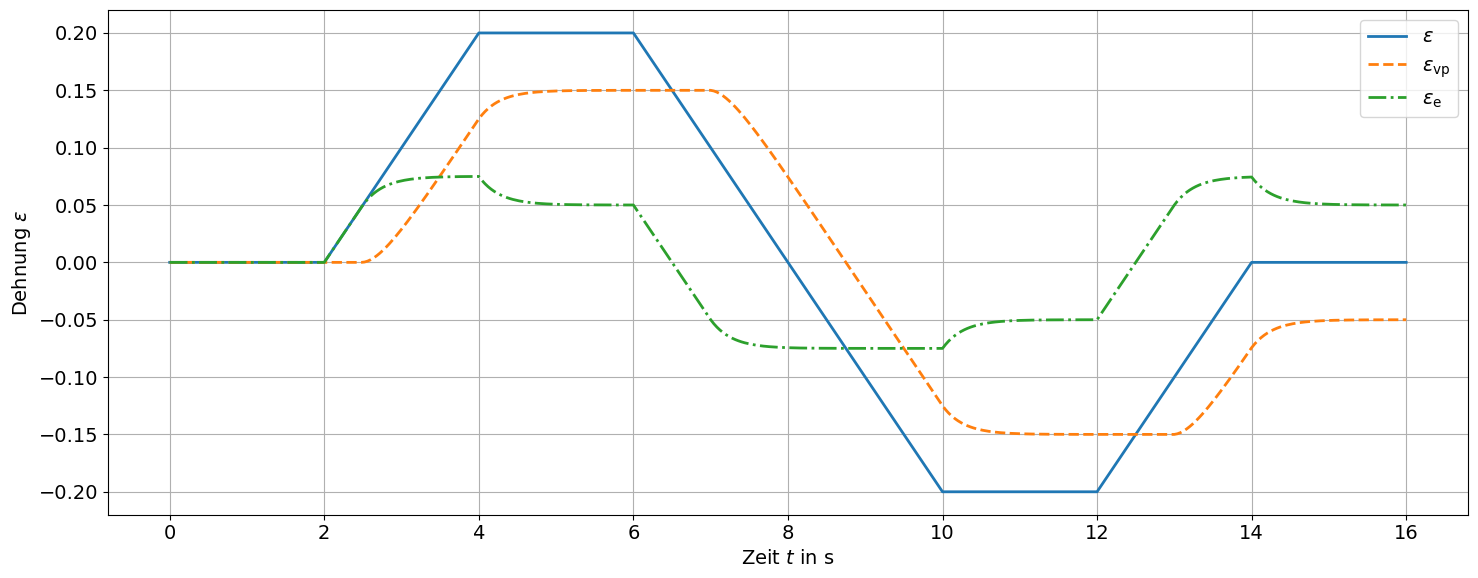

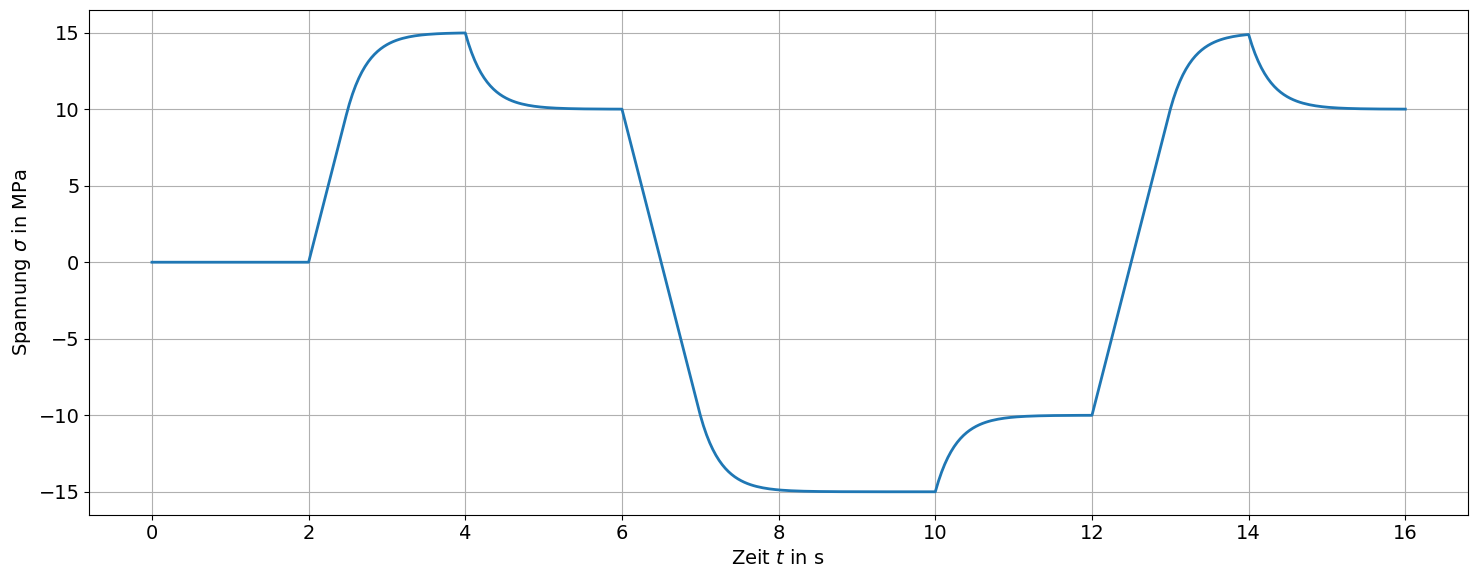

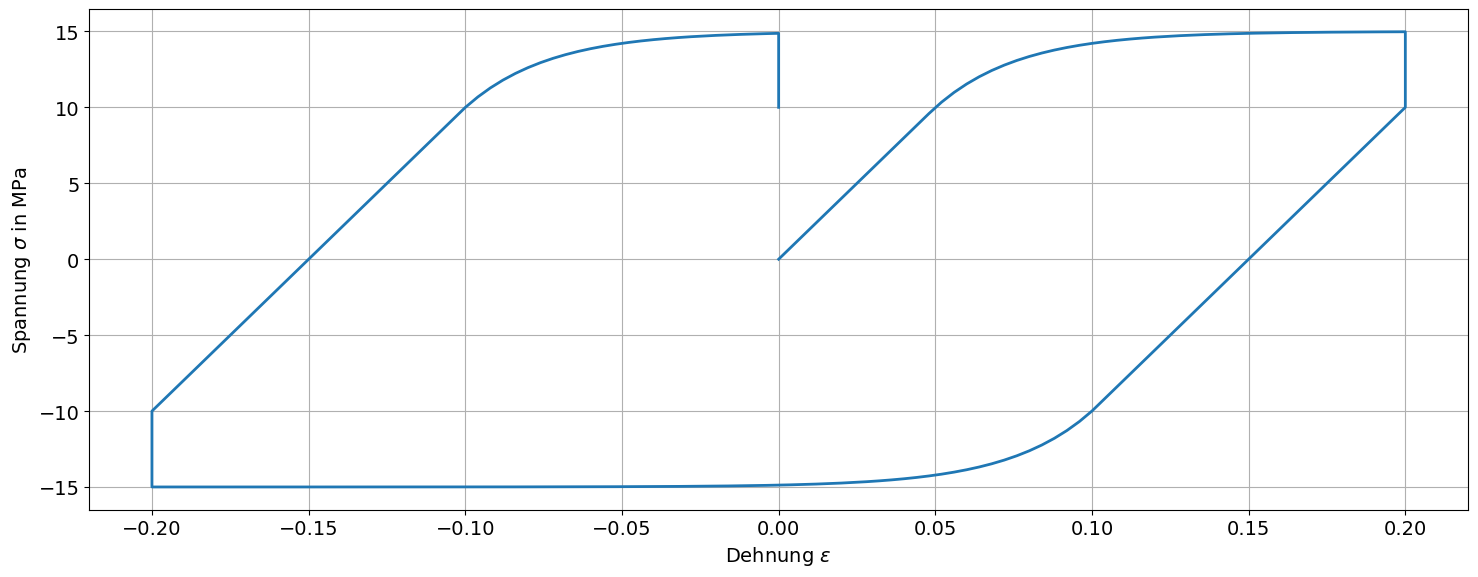

In [6]:
# Materialparameter des Bingham-Hooke-Körpers
E = 200.0 # MPa
sigy = 10.0 # MPa
eta = 50.0 # MPa s

# Initialisierung der Arrays für Spannung und viskoplastische Dehnung
sig = np.zeros_like(eps)
epsvp = np.zeros_like(eps) # (zu Beginn ist epsvp = 0)

# Berechnung der Spannung und viskoplastischen Dehnung für jeden Zeitschritt
for i in range(1,len(eps)):
    # Berechnung der aktuellen Spannung und viskoplastischen Dehnung
    # unter Verwendung der Werte aus dem vorherigen Zeitschritt (i-1)
    sig[i], epsvp[i] = stress(eps[i], epsvp[i-1], dt[i], E, sigy, eta)

# Plot 1: Zeitlicher Verlauf der Dehnung
plt.figure()
plt.plot(t, eps, '-', label=r'$\varepsilon$')
plt.plot(t, epsvp, '--', label=r'$\varepsilon_\mathrm{vp}$')
plt.plot(t, eps - epsvp, '-.', label=r'$\varepsilon_\mathrm{e}$')
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$ ')
plt.ylabel(r'Dehnung $\varepsilon$')
plt.legend()
plt.tight_layout()

# Plot 2: Zeitlicher Verlauf der Spannung
plt.figure()
plt.plot(t, sig, '-')
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$ ')
plt.ylabel(r'Spannung $\sigma$ in $\mathrm{MPa}$')
plt.tight_layout()

# Plot 3: Spannungs-Dehnungs-Diagramm
plt.figure()
plt.plot(eps, sig, '-')
plt.xlabel(r'Dehnung $\varepsilon$')
plt.ylabel(r'Spannung $\sigma$ in $\mathrm{MPa}$')
plt.tight_layout()

---
# Numerische Lösung des Gleichungssystems

## Residuen-Format

Anstatt das Materialverhalten mittels des Predictor-Corrector-Schemas zu bestimmen, können wir das Gleichungssystem auch direkt ohne Fallunterscheidung über die ursprüngliche Formulierung mit der `max`-Funktion lösen. Dazu werden alle Gleichungen, auch wenn einige linear sind, als Residuenvektor formuliert, bestehend aus

<p style="padding: 10px 0 25px 0;">$$\normalsize
\mathbf{r} = \begin{bmatrix}
\sigma_{n+1} - E \, \left[\varepsilon_{n+1} - \varepsilon_{\mathrm{vp}\,n+1}\right] \\[1.5ex]
\varepsilon_{\mathrm{vp}\,n+1} - \varepsilon_{\mathrm{vp}\,n} - \Delta \lambda \, \dfrac{\sigma_{n+1}}{\vert\,\sigma_{n+1}\,\vert} \\[1.5ex]
\Delta \lambda \, \eta - \Delta t \max \left\{0, \Phi_{n+1}\right\} \\[1.5ex]
\Phi_{n+1} - \vert\,\sigma_{n+1}\,\vert + \sigma_y
\end{bmatrix} = \mathbf 0
\ .$$
</p>
Durch Lösen des nichtlinearen Gleichungssystems mittels nummerischer Verfahren (z.B. Newton-Verfahren, siehe A 0.5) erhalten wir die Materialantwort. Insbesondere verzichtet diese alternative Methode auf die im Predictor-Corrector-Schema verwendeten Bedingungen $\sigma/\vert\,\sigma\,\vert = \sigma^\mathrm{tr}/\vert\,\sigma^\mathrm{tr}\,\vert$ und $\varPhi = \varPhi^\mathrm{tr} - E \, \Delta \lambda$, sodass wir durch den Vergleich der Ergebnisse beider Lösungswege diese Annahmen überprüfen können. Zudem können wir anhand des Residuen-Formats die Materialantwort für den Kriechversuch berechnen.

---
**Aufgabe**

Implementieren Sie die Funktion `res`, welche den Residuenvektors $\mathbf{r}$ basierend auf den oben aufgestellten Gleichungen berechnet.

In [7]:
def res(eps, sig, epsvp, dlambda, phi, epsvpn, dt, E, sigy, eta):
    """
    Berechnet das Residuum des Bingham-Hooke-Körpers für gegebene Werte.
    """

    # Residuum der Spannungs-Dehnungs-Beziehung (konstitutive Gleichung)
    r1 = sig - E * (eps - epsvp)

    # Residuum der Fließregel (Evolutionsgleichung für die viskoplastische Dehnung)
    r2 = epsvp - epsvpn - dlambda * np.sign(sig) # sig / np.abs(sig)

    # Residuums des viskoplastischen Multiplikators
    r3 = dlambda * eta - dt * max(0, phi)

    # Residuum der Fließbedingung (Fließfunktion)
    r4 = phi - np.abs(sig) + sigy
    
    return np.array([r1, r2, r3, r4])

**Überprüfung der Implementierung**

Die folgende Zelle testet Ihre Implementierung der Funktion `res` gegenüber einer Referenzlösung. Sollten Abweichungen auftreten, überprüfen und korrigieren Sie Ihre Funktion. Führen Sie anschließend diese Zelle erneut aus, um den Test zu wiederholen.

In [8]:
# Testfunktion aus Musterlösung importieren
from musterloesungen import test_residuum

# Implementierung der Residuenfunktion überprüfen
test_residuum(res)

Die Funktion ist korrekt.


---
# Beispiel: Relaxationsversuch unter zyklischer Belastung über das Residuen-Format

In diesem Abschnitt soll die Spannungsantwort $\sigma\!\left(t\right)$ und der zeitliche Verlauf der viskoplastischen Dehnung $\varepsilon_\mathrm{vp}\!\left(t\right)$ für den zuvor definierten Dehnungsverlauf $\varepsilon\!\left(t\right)$ im Relaxationsversuch unter zyklischer Belastung erneut berechnet werden. Im Gegensatz zur vorherigen Berechnung soll diesmal der Residuenvektor $\boldsymbol r = \boldsymbol 0$ gelöst werden.

Für diese Aufgabe soll die SciPy-Funktion `fsolve` verwendet werden, welche mindestens die folgenden Argumente benötigt:
- Eine Funktion (hier `res_function`), welche ein Array `x` mit den Werten der Unbekannten ($\sigma_{n+1}$, $\varepsilon_{\mathrm{v}\,n+1}$, $\Delta \lambda$ und $\varPhi_{n+1}$) als einziges Argument erhält
- Ein Array `x0` mit Startwerten für die Unbekannten. Verwenden Sie zunächst die Startwerte $\boldsymbol x_0 = \boldsymbol 0$.

---
**Aufgabe**

Implementieren Sie die Funktion `stress_res`, welche die Materialantwort für den Relaxationsversuch durch Lösen der Residuen-Gleichung berechnet.

**Hinweis**:
Die Python-Funktion [`lambda`](https://www.w3schools.com/python/python_lambda.asp), die SciPy-Funktion [`fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) und die NumPy-Funktion [`np.allclose`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) werden verwendet.

In [9]:
def stress_res(eps, epsvpn, dt, E, sigy, eta, x0 = np.array([0.0, 0.0, 0.0, 0.0])):
    """
    Berechnet Spannung und viskoplastische Dehnung durch Lösen der Residuen-Gleichung.
    """

    # Definition der Residuenfunktion als Lambda-Funktion
    # x[0] repräsentiert die Spannung (sig)
    # x[1] repräsentiert die viskoplastische Dehnung (epsvp)
    # x[2] repräsentiert den viskoplastischen Multiplikator (dlambda)
    # x[3] repräsentiert die Fließfunktion (phi)
    #                        res(eps, sig,  epsvp, dlambda, phi,  epsvpn, dt, E, sigy, eta)
    res_function = lambda x: res(eps, x[0], x[1],  x[2],    x[3], epsvpn, dt, E, sigy, eta)

    # Numerische Lösung der Residuen-Gleichung mit fsolve
    # x0 sind die Startwerte für die erste Iteration
    x = fsolve(res_function, x0)

    # Überprüfung, ob die gefundene Lösung das Residuum ausreichend minimiert
    assert np.allclose(res_function(x), np.zeros_like(x)), "Residuum nicht nahe Null!"

    # Rückgabe der relevanten Lösungen: Spannung (x[0]) und viskoplastische Dehnung (x[1])
    return x[0], x[1]

**Überprüfung der Implementierung**

Die folgende Zelle testet Ihre Implementierung der Funktion `stress_res` gegenüber einer Referenzlösung. Sollten Abweichungen auftreten, überprüfen und korrigieren Sie Ihre Funktion. Führen Sie anschließend diese Zelle erneut aus, um den Test zu wiederholen.

In [10]:
# Testfunktion aus Musterlösung importieren
from musterloesungen import test_stress_res

# Implementierung der kombinierten Spannungs- und Residuenfunktion überprüfen
test_stress_res(stress_res)

Die Funktion ist korrekt.


---
Im Folgenden sollen die beiden implementierten Lösungsmethoden (direkte Methode via `stress`, Residuen-Format via `stress_res`) für die Berechnung der Spannungsantwort im Relaxationsversuch unter zyklischer Belastung verglichen werden. Bei korrekter Implementierung sollten beide Methoden dieselben Ergebnisse liefern.

---
**Aufgabe**

Vervollständigen Sie den folgenden Programmcode, um die Spannungsantwort des Relaxationsversuchs unter zyklischer Belastung sowohl mit der direkten Methode (`stress`) als auch mit der Methode basierend auf dem Residuen-Format (`stress_res`) zu berechnen und die Ergebnisse zu vergleichen.

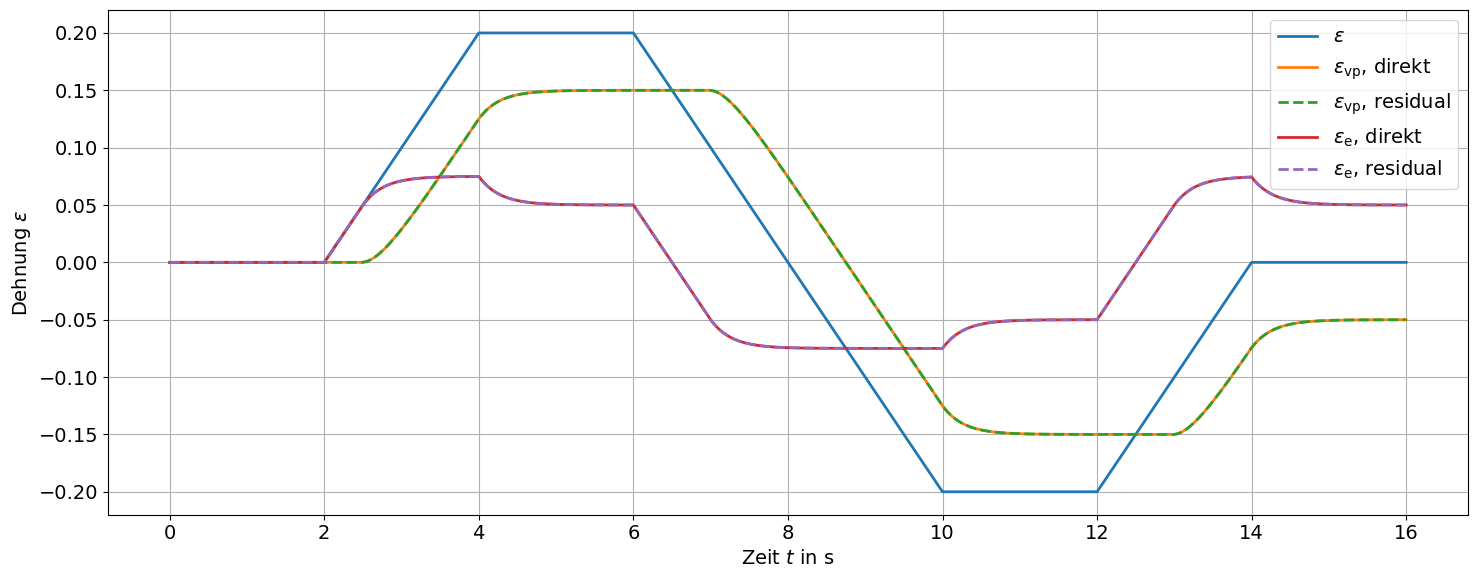

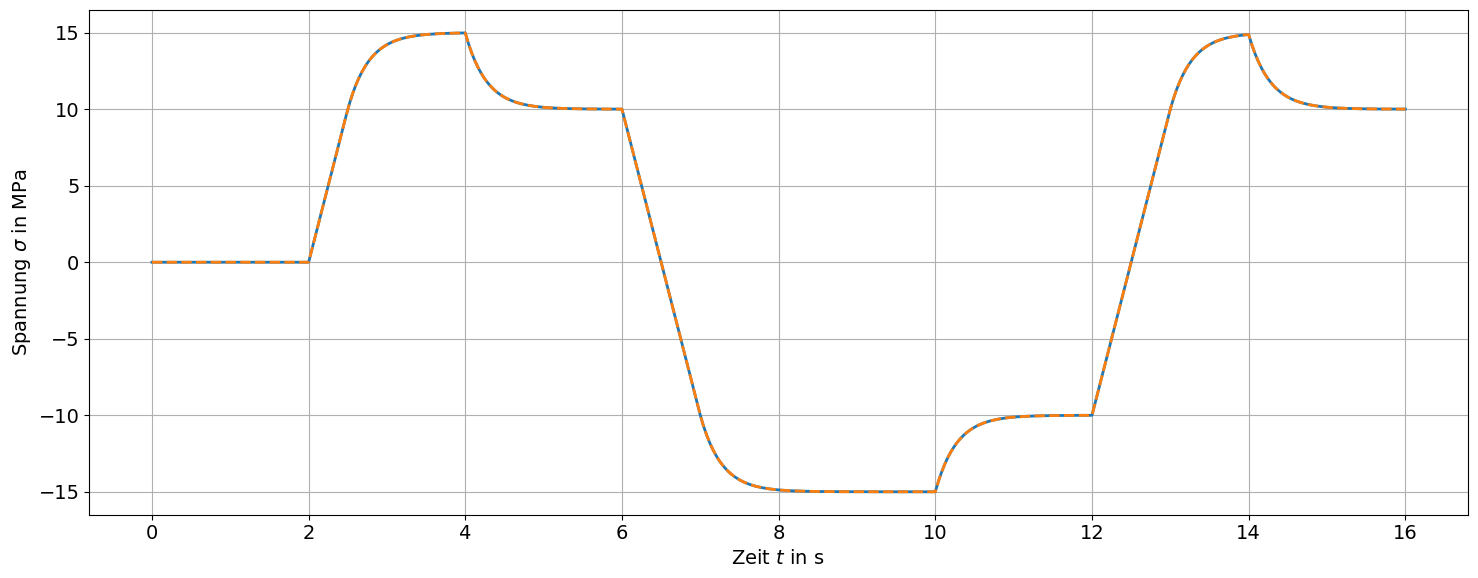

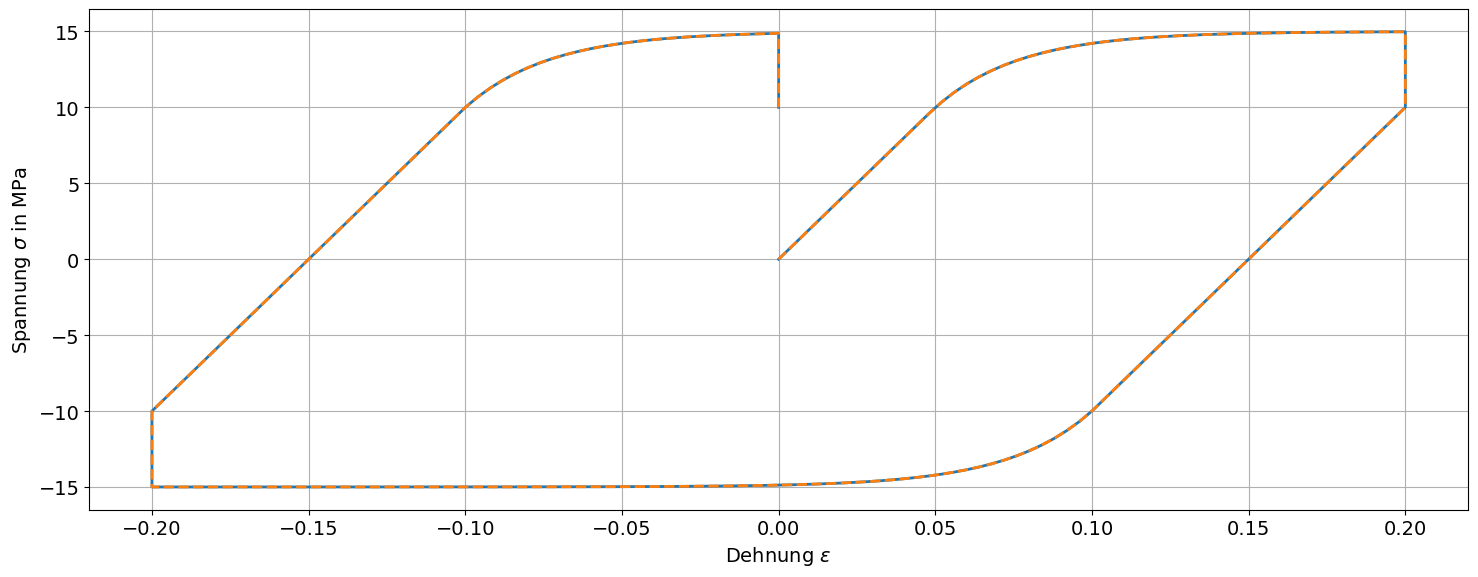

In [11]:
# Materialparameter des Bingham-Hooke-Körpers
E = 200.0 # MPa
sigy = 10.0 # MPa
eta = 50.0 # MPa s

# Initialisierung der Arrays für Spannung und viskoplastische Dehnung
sig = np.zeros_like(eps)
epsvp = np.zeros_like(eps) # (zu Beginn ist epsvp = 0)
sig_res = np.zeros_like(eps)
epsvp_res = np.zeros_like(eps) # (zu Beginn ist epsvp_res = 0)

# Berechnung der Spannung und viskoplastischen Dehnung für jeden Zeitschritt
for i in range(1,len(eps)):
    # Direkte Berechnung
    sig[i], epsvp[i] = stress(eps[i], epsvp[i-1], dt[i], E, sigy, eta)
    # Residuelle Berechnung
    sign_res = sig_res[i-1]; epsvpn_res = epsvp_res[i-1]; dlambdan = 0.0; phin_res = np.abs(sign_res) - sigy
    sig_res[i], epsvp_res[i] = stress_res(eps[i], epsvp[i-1], dt[i], E, sigy, eta, np.array([sign_res, epsvpn_res, dlambdan, phin_res]))

# Plot 1: Zeitlicher Verlauf der Dehnung
plt.figure()
plt.plot(t, eps, '-', label=r'$\varepsilon$')
plt.plot(t, epsvp, '-', label=r'$\varepsilon_\mathrm{vp}$, direkt')
plt.plot(t, epsvp_res, '--', label=r'$\varepsilon_\mathrm{vp}$, residual')
plt.plot(t, eps - epsvp, '-', label=r'$\varepsilon_\mathrm{e}$, direkt')
plt.plot(t, eps - epsvp_res, '--', label=r'$\varepsilon_\mathrm{e}$, residual')
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$ ')
plt.ylabel(r'Dehnung $\varepsilon$')
plt.legend()
plt.tight_layout()

# Plot 2: Zeitlicher Verlauf der Spannung
plt.figure()
plt.plot(t, sig, '-', label=r'$\sigma$, direkt')
plt.plot(t, sig_res, '--', label=r'$\sigma$, residual')
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$ ')
plt.ylabel(r'Spannung $\sigma$ in $\mathrm{MPa}$')
plt.tight_layout()

# Plot 3: Spannungs-Dehnungs-Diagramm
plt.figure()
plt.plot(eps, sig, '-', label=r'$\sigma$, direkt')
plt.plot(eps, sig_res, '--', label=r'$\sigma$, residual')
plt.xlabel(r'Dehnung $\varepsilon$')
plt.ylabel(r'Spannung $\sigma$ in $\mathrm{MPa}$')
plt.tight_layout()

----
# Beispiel: Kriechversuch unter zyklischer Belastung über Residuen-Format

Im vorherigen Relaxationsversuch wurde die Dehnung $\varepsilon\!\left(t\right)$ vorgegeben und die Materialantwort in Form der Spannung $\sigma\!\left(t\right)$ berechnet. Im Folgenden wollen wir das inverse Problem betrachten, indem wir die Spannung $\sigma\!\left(t\right)$ vorschreiben und die Materialantwort in Form der Dehnung $\varepsilon\!\left(t\right)$ berechnen.

---
**Aufgabe**

Implementieren Sie die Funktion `strain_res`, welche die Dehnung $\varepsilon_{n+1}$ und die viskoplastische Dehnung $\varepsilon_{\mathrm{v}\,n+1}$ durch Lösen der Residuen-Gleichung ermittelt.

**Hinweis**:
Die Python-Funktion [`lambda`](https://www.w3schools.com/python/python_lambda.asp), die SciPy-Funktion [`fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) und die NumPy-Funktion [`np.allclose`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) werden verwendet.


In [12]:
def strain_res(sig, epsvpn, dt, E, sigy, eta, x0 = np.array([0.0, 0.0, 0.0, 0.0])):
    """
    Berechnet Gesamtdehnung und viskoplastische Dehnung durch Lösen der Residuen-Gleichung.
    """

    # Definition der Residuenfunktion als Lambda-Funktion
    # x[0] repräsentiert die Gesamtdehnung (eps)
    # x[1] repräsentiert die viskoplastische Dehnung (epsvp)
    # x[2] repräsentiert den viskoplastischen Multiplikator (dlambda)
    # x[3] repräsentiert die Fließfunktion (phi)
    #                        res(eps,  sig, epsvp, dlambda, phi,  epsvpn, dt, E, sigy, eta)
    res_function = lambda x: res(x[0], sig, x[1],  x[2],    x[3], epsvpn, dt, E, sigy, eta)

    # Numerische Lösung der Residuen-Gleichung mit fsolve
    # x0 sind die Startwerte für die erste Iteration
    x = fsolve(res_function, x0)

    # Überprüfung, ob die gefundene Lösung das Residuum ausreichend minimiert
    assert np.allclose(res_function(x), np.zeros_like(x)), "Residuum nicht nahe Null!"

    # Rückgabe der relevanten Lösungen: Gesamtdehnung (x[0]) und viskoplastische Dehnung (x[1])
    return x[0], x[1]

**Überprüfung der Implementierung**

Die folgende Zelle testet Ihre Implementierung der Funktion `strain_res` gegenüber einer Referenzlösung. Sollten Abweichungen auftreten,<br>überprüfen und korrigieren Sie Ihre Funktion. Führen Sie anschließend diese Zelle erneut aus, um den Test zu wiederholen.

In [13]:
# Testfunktion aus Musterlösung importieren
from musterloesungen import test_strain_res

# Implementierung der Dehnungs- und Residuenfunktion überprüfen
test_strain_res(strain_res)

Die Funktion ist korrekt.


---
Es soll nun die Materialantwort für den Kriechversuch mit einem zum vorherigen Dehnungsverlauf analogen Spannungsverlauf $\sigma\!\left(t\right)$ berechnet werden. Dabei sollen sowohl der Dehnungsverlauf $\varepsilon\!\left(t\right)$ als auch der Verlauf der viskoplastischen Dehnung $\varepsilon_\mathrm{vp}\!\left(t\right)$ bestimmt werden.

---
**Aufgabe**

Vervollständigen Sie den folgenden Programmcode, um die Materialantwort für den Kriechversuch unter zyklischer Belastung zu berechnen.

**Hinweis**:
Orientieren Sie sich an der Implementierung des Relaxationsversuchs (Residuen-Format) und nutzen Sie die Funktion `strain_res`.

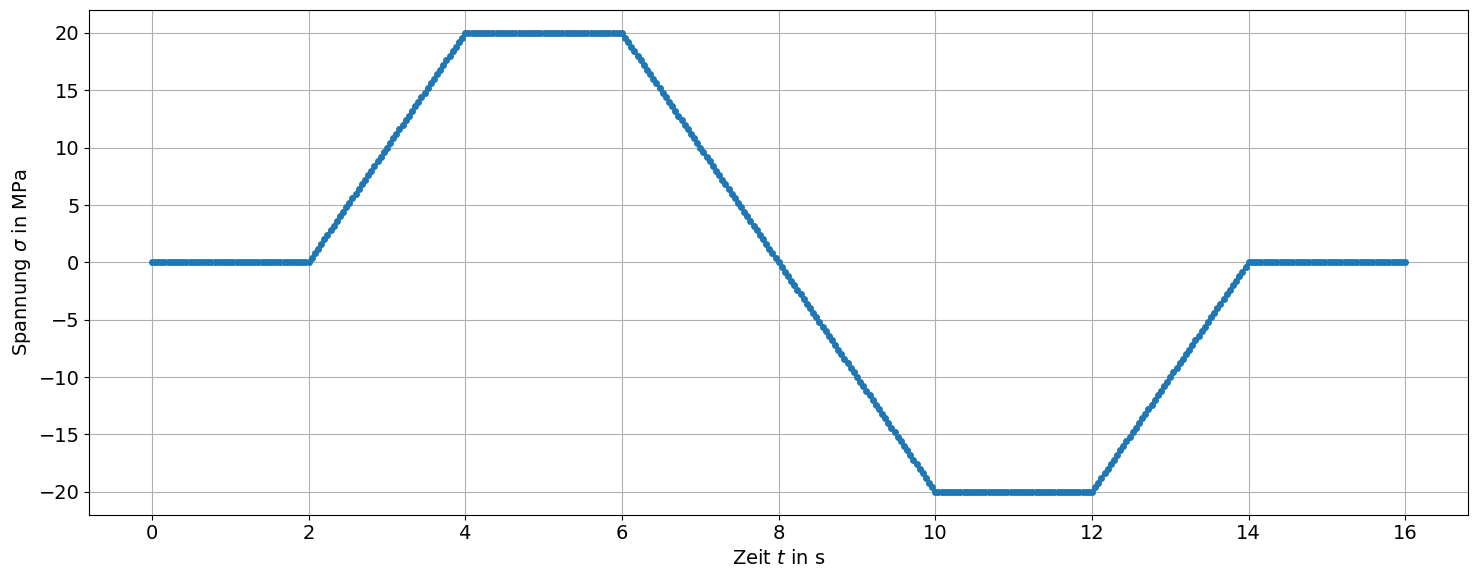

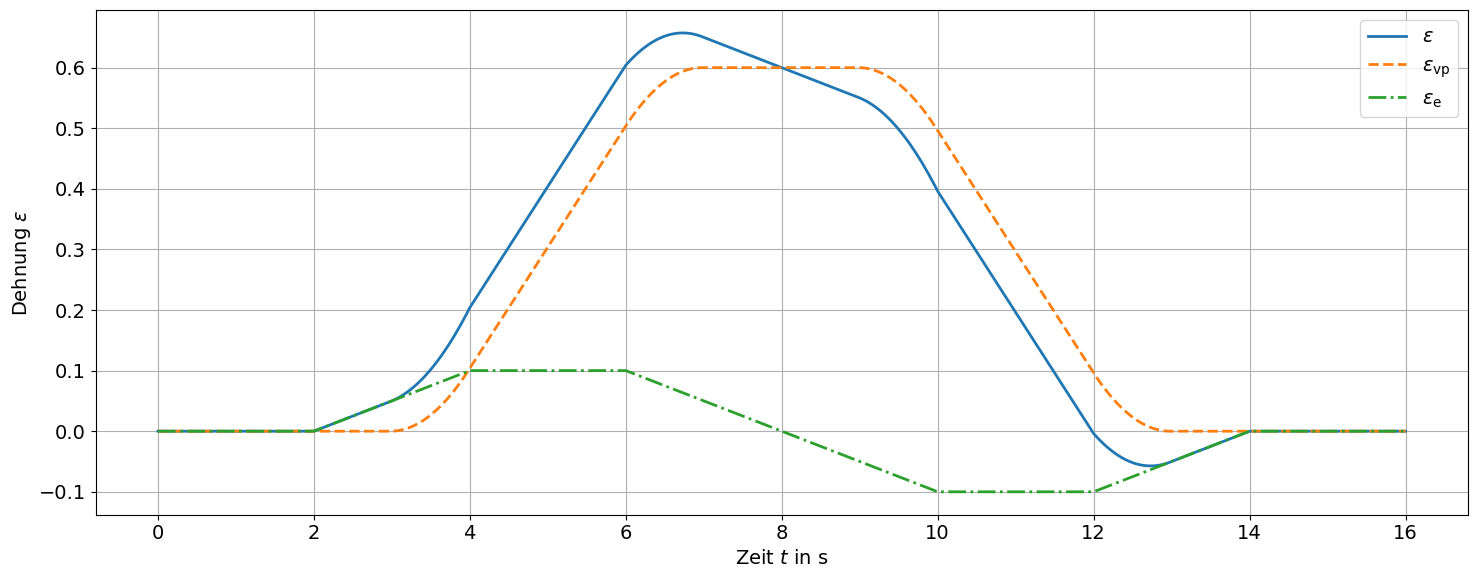

In [14]:
# Skalierungsfaktor für die Anzahl der Datenpunkte pro Belastungsabschnitt
fct = 50

# Definition der Belastungsabschnitte
t_1, dt_1, sig_1 = generate_load( 0.0, 2.0,   0.0,   0.0, 1*fct,  False)
t_2, dt_2, sig_2 = generate_load( 2.0, 4.0,   0.0,   20.0, 1*fct,  False)
t_3, dt_3, sig_3 = generate_load( 4.0, 6.0,   20.0,  20.0, 1*fct, False)
t_4, dt_4, sig_4 = generate_load( 6.0, 10.0,  20.0, -20.0, 2*fct, False)
t_5, dt_5, sig_5 = generate_load(10.0, 12.0, -20.0, -20.0, 1*fct, False)
t_6, dt_6, sig_6 = generate_load(12.0, 14.0, -20.0,  0.0, 1*fct, False)
t_7, dt_7, sig_7 = generate_load(14.0, 16.0,  0.0,   0.0, 1*fct, True)

# Zusammenfügen der Arrays für die gesamte Belastung
t = np.concatenate([t_1, t_2, t_3, t_4, t_5, t_6, t_7])
dt = np.concatenate([dt_1, dt_2, dt_3, dt_4, dt_5, dt_6, dt_7])
sig = np.concatenate([sig_1, sig_2, sig_3, sig_4, sig_5, sig_6, sig_7])

# Materialparameter des Bingham-Hooke-Körpers
E = 200.0 # MPa
sigy = 10.0 # MPa
eta = 50.0 # MPa s

# Initialisierung der Arrays für Dehnung und viskoplastische Dehnung
eps = np.zeros_like(sig)
epsvp = np.zeros_like(sig) # (zu Beginn ist epsvp = 0)

# Berechnung der Dehnung und viskoplastischen Dehnung für jeden Zeitschritt
for i in range(1,len(eps)):
    # Berechnung der aktuellen Dehnung und viskoplastischen Dehnung
    # unter Verwendung der Werte aus dem vorherigen Zeitschritt (i-1)
    eps[i], epsvp[i] = strain_res(sig[i], epsvp[i-1], dt[i], E, sigy, eta)

# Plot 1: Zeitlicher Verlauf der Spannung
plt.figure()
plt.plot(t, sig, '-', marker='o', markersize=4)
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$')
plt.ylabel(r'Spannung $\sigma$ in $\mathrm{MPa}$')
plt.tight_layout()

# Plot 2: Zeitlicher Verlauf der Dehnung
plt.figure()
plt.plot(t, eps, '-', label=r'$\varepsilon$')
plt.plot(t, epsvp, '--', label=r'$\varepsilon_\mathrm{vp}$')
plt.plot(t, eps - epsvp, '-.', label=r'$\varepsilon_\mathrm{e}$')
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$')
plt.ylabel(r'Dehnung $\varepsilon$')
plt.legend()
plt.tight_layout()

---
# Beispiel: Relaxationsversuch für Dehnungssprung mit Parameterstudie

Nachdem wir das Verhalten des Bingham-Hooke-Körpers erfolgreich mit unserem Programm simuliert haben, können wir nun den Einfluss verschiedener Materialparameter untersuchen. Es soll eine Parameterstudie für den Relaxationsversuch mit den Viskositätswerten $\eta = \{100, 25, 10\}$ MPa s durchgeführt werden. Analog zur Programmierübung Viskoelastizität soll als Lastpfad ein auf den Dehnungswert $\varepsilon_\mathrm{max} = 0.1$ sprunghaft ansteigender und anschließend konstant gehaltener Dehnungsverlauf $\varepsilon\!\left(t\right)$ vorgegeben werden.

---
**Aufgabe**

Vervollständigen Sie den folgenden Programmcode, um die Parameterstudie für den Relaxationsversuch durchzuführen.

**Hinweis**:
Orientieren Sie sich an der Implementierung des Relaxationsversuchs.

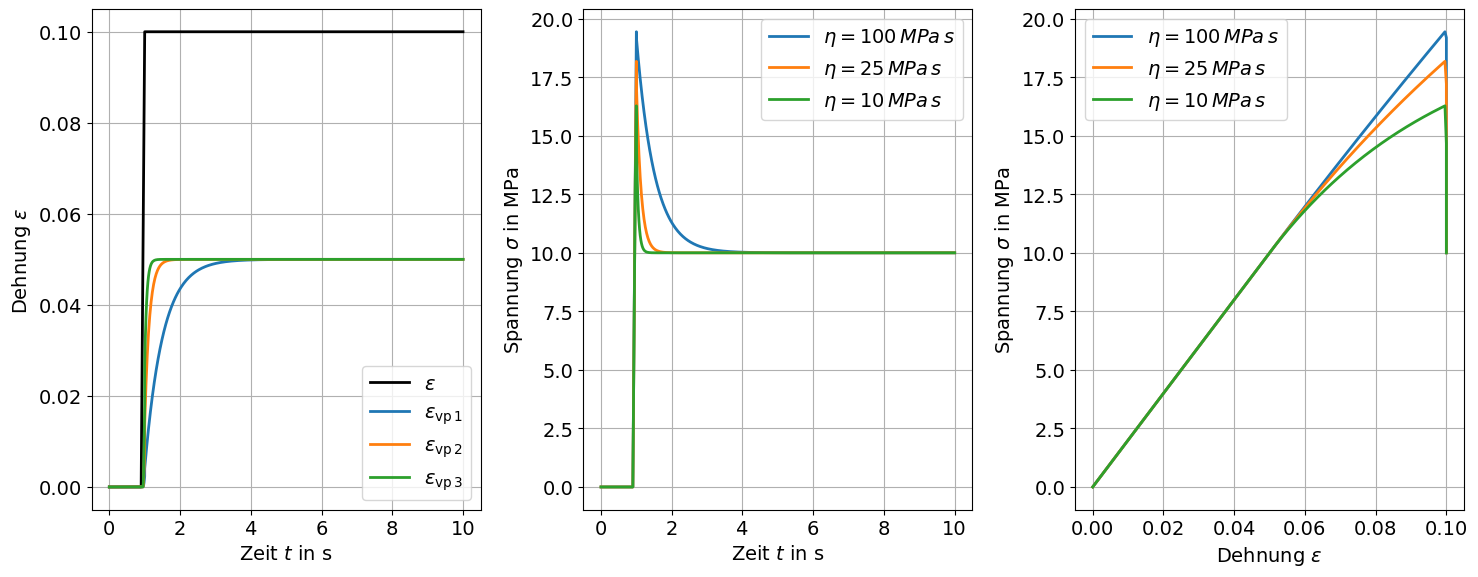

In [15]:
# Skalierungsfaktor für die Anzahl der Datenpunkte pro Belastungsabschnitt
fct = 50

# Definition der Belastungsabschnitte
t_1, dt_1, eps_1 = generate_load(0.0, 0.9,  0.0, 0.0, 1*fct,  False)
t_2, dt_2, eps_2 = generate_load(0.9, 1.0,  0.0, 0.1, 5*fct,  False)
t_3, dt_3, eps_3 = generate_load(1.0, 10.0, 0.1, 0.1, 10*fct, True)

# Zusammenfügen der Arrays für die gesamte Belastung
t = np.concatenate([t_1, t_2, t_3])
dt = np.concatenate([dt_1, dt_2, dt_3])
eps = np.concatenate([eps_1, eps_2, eps_3])

# Anzahl der Parametersätze und Definition der Materialparameter
nmatParams = 3
#             E (MPa) sigy (MPa) eta (MPa s)
matParams = [(200.0,  10.0,      100.0),  # Parametersatz 1
             (200.0,  10.0,      25.0),   # Parametersatz 2
             (200.0,  10.0,      10.0),   # Parametersatz 2
            ]

# Initialisierung der Arrays für Spannung und viskoplastischen Dehnung (für alle Parametersätze)
sig = np.zeros((nmatParams, len(eps)))
epsvp = np.zeros((nmatParams, len(eps))) # (zu Beginn ist epsvp = 0 für jeden Parametersatz)

# Berechnung für jeden Parametersatz
for iParam in range(nmatParams):
    # Materialparameter für diesen Satz
    E, sigy, eta = matParams[iParam]

    # Berechnung der Spannung und viskoplastischen Dehnung für jeden Zeitschritt (für diesen Parametersatz)
    for i in range(len(eps)):
        sig[iParam, i], epsvp[iParam, i] = stress(eps[i], epsvp[iParam, i-1], dt[i], E, sigy, eta)

# Diagramm 1: Zeitlicher Verlauf der Dehnung (alle Parametersätze)
plt.subplot(131)
plt.plot(t, eps, 'k-', label=r'$\varepsilon$')
plt.plot(t, epsvp[0,:], '-', label=r'$\varepsilon_\mathrm{vp\,1}$')
plt.plot(t, epsvp[1,:], '-', label=r'$\varepsilon_\mathrm{vp\,2}$')
plt.plot(t, epsvp[2,:], '-', label=r'$\varepsilon_\mathrm{vp\,3}$')
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$')
plt.ylabel(r'Dehnung $\varepsilon$')
plt.legend()
plt.tight_layout()

# Plot 2: Zeitlicher Verlauf der Spannung (alle Parametersätze)
plt.subplot(132)
plt.plot(t, sig[0,:], '-', label=r'$\eta = 100 \, MPa \, s$')
plt.plot(t, sig[1,:], '-', label=r'$\eta = 25 \, MPa \, s$')
plt.plot(t, sig[2,:], '-', label=r'$\eta = 10 \, MPa \, s$')
plt.xlabel(r'Zeit $t$ in $\mathrm{s}$ ')
plt.ylabel(r'Spannung $\sigma$ in $\mathrm{MPa}$')
plt.legend()
plt.tight_layout()

# Plot 3: Spannungs-Dehnungs-Diagramm (alle Parametersätze)
plt.subplot(133)
plt.plot(eps, sig[0,:], '-', label=r'$\eta = 100 \, MPa \, s$')
plt.plot(eps, sig[1,:], '-', label=r'$\eta = 25 \, MPa \, s$')
plt.plot(eps, sig[2,:], '-', label=r'$\eta = 10 \, MPa \, s$')
plt.xlabel(r'Dehnung $\varepsilon$')
plt.ylabel(r'Spannung $\sigma$ in $\mathrm{MPa}$')
plt.legend()
plt.tight_layout()

---
# Weiterführende Aufgaben

Zur Vertiefung Ihres Verständnisses des Bingham-Hooke-Körpers können Sie
- weitere Parameterstudien für den Relaxations- und Kriechversuch durchführen,
- die Materialantwort des Prandtl-Körpers berechnen.<br>(durch eine geeignete Wahl der Materialparameter)